In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep  22 9:15:00 2020

@author: Liu Guanfu 
"""
%matplotlib notebook
# 如果不是在jupyter下运行，第七行删去。

############## 导入包 #################
from scipy.optimize import curve_fit
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
############ 定义要拟合的函数  #########

def func(x,a,b,c,d,f):
    return a*np.exp(b*x)*np.cos(c*x+d)+f

#############   测量的数据点 #################
x = np.linspace(0.25,20,80)
y = np.array([21.8,21.8,22.0,22.0,21.4,20.4,19.8,18.8,
              18.0,16.8,15.8,14.6,13.8,12.6,11.6,10.8,
              10.2,9.8,9.8,9.8,10.0,10.2,10.8,11.4,
              12.2,13.0,14.2,15.0,16.0,17.0,17.8,18.8,
              19.2,19.8,20.0,20.2,20.0,19.8,19.4,19.0,
              18.2,17.4,16.6,15.8,14.8,14.0,13.2,12.4,
              11.8,11.2,10.8,11.0,11.0,11.2,11.2,11.8,
              12.2,12.8,13.6,14.2,14.8,15.8,16.4,17.0,
              17.8,18.2,18.8,18.8,19.0,19.0,18.8,18.4,
              18.0,17.8,17.0,16.2,15.4,14.0,13.8,13.2])
########## 拟合    #########################
popt, pcov = curve_fit(func, x, y, maxfev=500000)

######### 拟合的系数 ########################
a = popt[0]
b = popt[1]
c = popt[2]
d = popt[3]
f = popt[4]
######## 拟合后的曲线  #######################
xx = np.linspace(min(x)-0.05,max(x)+0.05,2000)
yvals = func(xx,a,b,c,d,f)

######## 计算相关系数   #####################

r1 = np.cov(y,func(x,a,b,c,d,f)) #协方差矩阵
r = r1[0,1]/np.sqrt(np.product(np.diag(r1)))

print('r 等于',r)
print('popt:', popt)
print('系数a:', a)
print('系数b:', b)
print('系数c:', c)
print('系数d:', d)
print('系数f:', f)

r 等于 0.998353931915013
popt: [ 6.70027029 -0.03303073  0.76105663  5.66138456 15.17604931]
系数a: 6.700270294543212
系数b: -0.03303073258538585
系数c: 0.7610566276515967
系数d: 5.66138455970471
系数f: 15.176049309867095


<IPython.core.display.Javascript object>


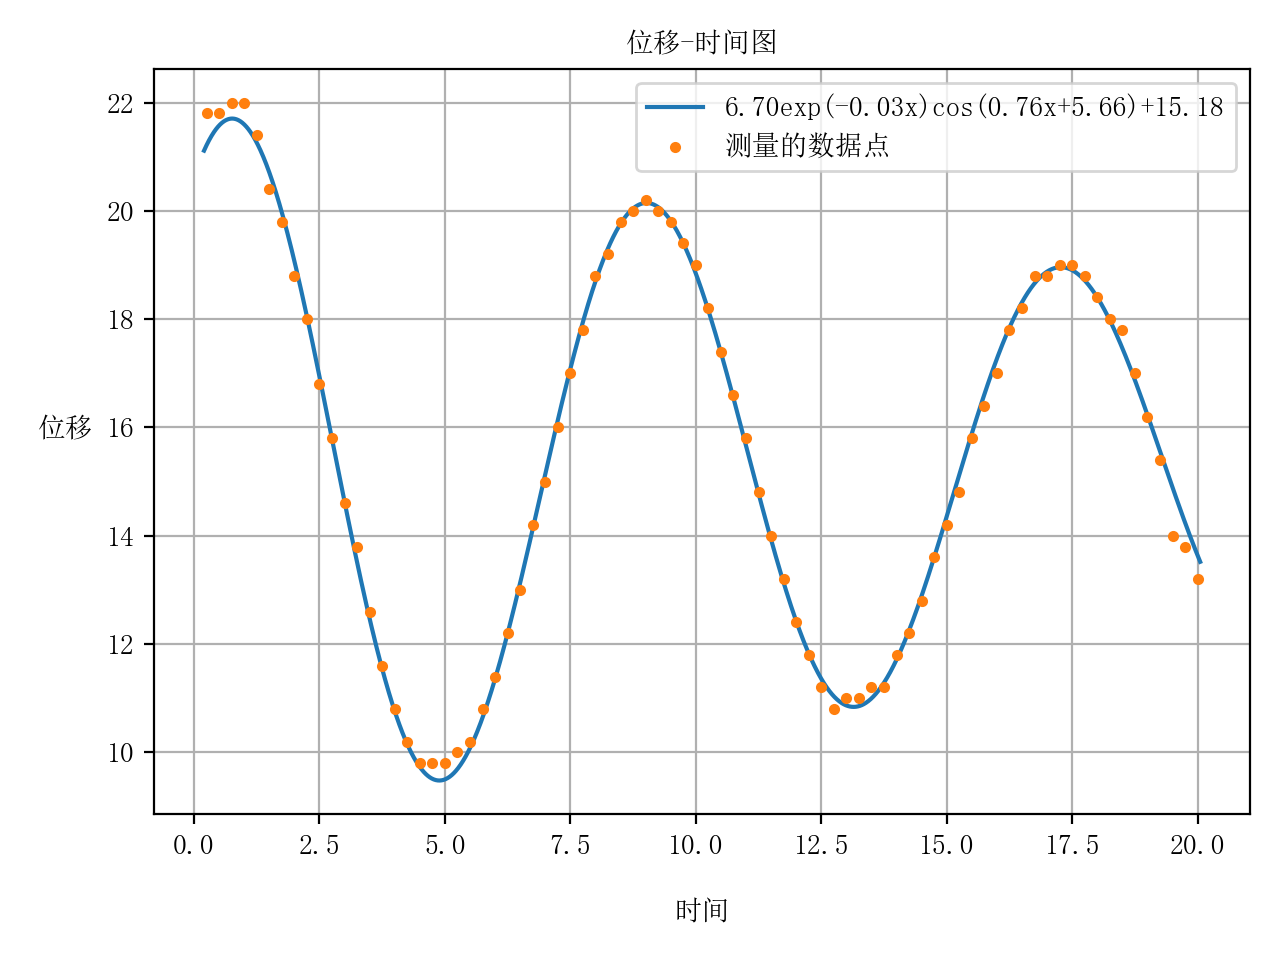

In [3]:
################ 有姿势地画图 ###############
label1 = '{a1:0.2f}exp({b1:0.2f}x)cos({c1:0.2f}x+{d1:0.2f})+{f1:0.2f}'.format(a1=a,b1=b,c1=c,d1=d,f1=f)
fig, ax = plt.subplots(dpi=160)
ax.set_xlabel('时间',fontproperties='SimSun',labelpad=15)
ax.set_ylabel('位移',fontproperties='SimSun',rotation=0,labelpad=15)
ax.set_title('位移-时间图',fontproperties='SimSun')
ax.grid()
ax.plot(xx, yvals, label=label1)
ax.plot(x, y, '.', label='测量的数据点')
ax.legend(loc='upper right',fontsize='small',prop={'family':'SimSun'})
fig.tight_layout()
fig.show()

In [4]:
plt.rcParams['font.sans-serif'] = ['SimSun'] 
plt.rcParams['axes.unicode_minus'] = False

In [7]:
np.shape(pcov)

(5, 5)

In [12]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

In [14]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.07418899, 0.00119767, 0.00125378, 0.01288919, 0.02404402])